<a href="https://colab.research.google.com/github/farinteractions/raspi-interactions/blob/main/Actividad_Semanal_7/TecMty_Regresion_lineal_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Semanal 7
## Notebook 1 :: Regresión

Fernando Ramirez - A01298109

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [3]:
#np.random.rand(100, 1)

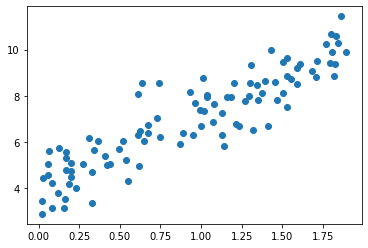

In [ ]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,7.966750
1,9.885662
2,4.460616
3,6.390568
4,7.679288
...,...
95,5.021959
96,8.545939
97,9.204936
98,9.460382


In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [ ]:
#X_fit[]

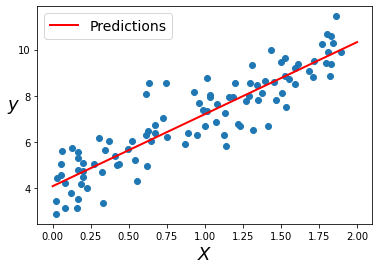

In [ ]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [ ]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [ ]:
X_new.shape

(2, 1)

In [ ]:
y_new = linear_reg.predict(X_new)
y_new

array([[4.15826933],
       [9.9062033 ]])

In [ ]:
 linear_reg.coef_, linear_reg.intercept_

(array([[2.87396698]]), array([4.15826933]))

The model estimates:

$\hat{y} = 2.874X + 4.16$

In [ ]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [ ]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

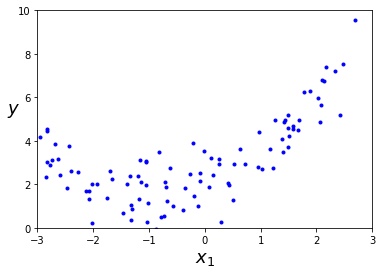

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.451945
1,1.811870
2,2.632622
3,0.413447
4,0.446136
...,...
95,8.136758
96,2.209926
97,1.579271
98,2.316947


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X_poly

`X_poly` now contains the original feature of X plus the square of the feature:

In [ ]:
print(X[0])
print(X[0]*X[0])

[0.74489345]
[0.55486625]


In [ ]:
X_poly[0]

array([0.74489345, 0.55486625])

Fit the model to this extended training data:

In [ ]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[0.99039778, 0.5352744 ]]), array([1.92761672]))

The model estimates:

$\hat{y} =  1.047X +0.513X^2 + 2.13$

Plot the data and the predictions:

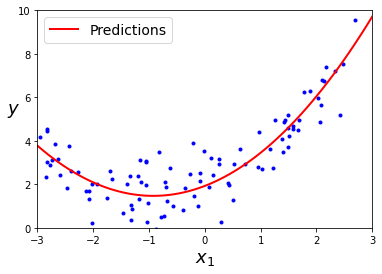

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [4]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
996,8.739752,27.536542
101,2.784380,39.552185
486,4.398994,42.036711
711,5.200223,36.200499
777,5.462198,35.306938
793,5.514347,32.653247
525,4.526320,29.926109
696,5.118078,38.773325
128,2.998296,42.393697
958,6.887838,29.131503


In [5]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [6]:
len(X)

1000

In [7]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

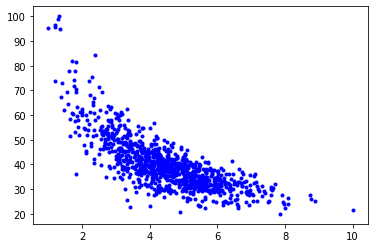

In [8]:
plt.plot(X,y,'b.')

In [9]:
# additional Libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [10]:
# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)


### Lineal

In [11]:
#lineal

In [12]:
# use LinearRegression and generate the model 
linear_reg = LinearRegression(fit_intercept=True)

# train the model using the data: X_train, y_train
linear_reg.fit(X_train, y_train)
linear_reg.coef_, linear_reg.intercept_

(array([-5.97912772]), 66.79997932683362)

Model Estimation:

$\hat{y} =  -5.98X + 66.8$

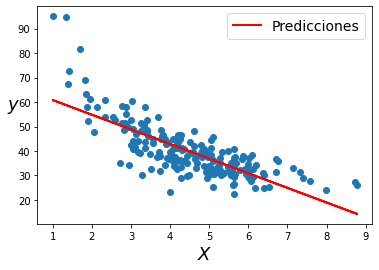

In [13]:
# use test data to test the model and plot the results
y_hat = linear_reg.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_hat, "r", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14);

In [14]:
# Errors
mae_lin = metrics.mean_absolute_error(y_test, y_hat)
rmse_lin = np.sqrt(metrics.mean_squared_error(y_test, y_hat))
r2_lin = r2_score(y_test, y_hat)
print('Error medio Absoluto (MAE):', mae_lin)
print('Root Mean Squared Error:', rmse_lin)
print('r2_score', r2_lin)

Error medio Absoluto (MAE): 5.033403667160277
Root Mean Squared Error: 7.067709647692056
r2_score 0.595798333672179


### Polynomial

In [18]:
#polinomial

In [19]:
# add a second degree to the equation
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)

In [20]:
# use LinearRegression to generate a model 
linear_reg_p = LinearRegression(fit_intercept=True)

# train the model using the polynomial data X_poly and output y
linear_reg_p.fit(X_train_poly, y_train)
linear_reg_p.coef_, linear_reg.intercept_

(array([-16.32506746,   1.12192589]), 66.79997932683362)

Model Estimation:

$\hat{y} =  -16.32X +1.122X^2 + 2.13$

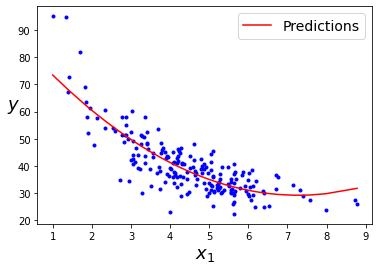

In [53]:
# use test data points to test the model and plot the results
X_test_poly = poly_features.transform(X_test)

y_hat2 = linear_reg_p.predict(X_test_poly)

orders = np.argsort(X_test.to_numpy().ravel())

plt.plot(X_test, y_test, "b.")
plt.plot(X_test.iloc[orders], y_hat2[orders], "r-", label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)


In [22]:
# Errors
mae_poly = metrics.mean_absolute_error(y_test, y_hat2)
rmse_poly = np.sqrt(metrics.mean_squared_error(y_test, y_hat2))
r2_poly = r2_score(y_test, y_hat2)

print('Error medio Absoluto (MAE):', mae_poly)
print('Root Mean Squared Error:', rmse_poly)
print('r2_score', r2_poly)

Error medio Absoluto (MAE): 4.410633826931783
Root Mean Squared Error: 5.9655858389751355
r2_score 0.7120302307125213


### plot for Ridge and Lasso

In [74]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def plot_model(X, y, Xtest, ytest, model_class, polynomial, deg, alphas, **model_kwargs):
    plt.plot(Xtest, ytest, "b.", linewidth=1)
    #plt.scatter(Xtest, ytest)
    
    for alpha, style in zip(alphas, ("k:", "r-", "g+")):
        
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=deg, include_bias=False),
                StandardScaler(),
                model)
        
        # train the model
        model.fit(X, y)
        # test the model
        y_hat = model.predict(Xtest)
        
        orders = np.argsort(X_test.to_numpy().ravel())

        plt.plot(X_test.iloc[orders], y_hat[orders], style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
        
        print('Polynomial degree={}, \talpha={}, \tr2_error={}'.format(deg, alpha, r2_score(y_test, y_hat)))

    plt.legend(loc="upper right")
    plt.xlabel("$x$ - degree=" + str(deg))
    plt.grid()

### Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X_train, y_train)

In [ ]:
# Errors
mae_ridge = metrics.mean_absolute_error(y_test, y_hat3)
rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test, y_hat3))
r2_ridge = r2_score(y_test, y_hat3)

print('Error medio Absoluto (MAE):', mae_ridge)
print('Root Mean Squared Error:', rmse_ridge)
print('r2_score', r2_ridge)

### Lasso

In [24]:
from sklearn.linear_model import Lasso


Polynomial degree=2, 	alpha=0, 	r2_error=0.7120302307125211
Polynomial degree=2, 	alpha=0.01, 	r2_error=0.7108227043539002
Polynomial degree=2, 	alpha=0.1, 	r2_error=0.6916983522727777
Polynomial degree=5, 	alpha=0, 	r2_error=0.756423891386925
Polynomial degree=5, 	alpha=0.01, 	r2_error=0.7315073629039277
Polynomial degree=5, 	alpha=0.1, 	r2_error=0.6825481310382042
Polynomial degree=10, 	alpha=0, 	r2_error=0.7192877665522508
Polynomial degree=10, 	alpha=0.01, 	r2_error=0.7336174795996029
Polynomial degree=10, 	alpha=0.1, 	r2_error=0.692175145416103


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.399e+02, tolerance: 8.743e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.358e+02, tolerance: 8.743e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[]

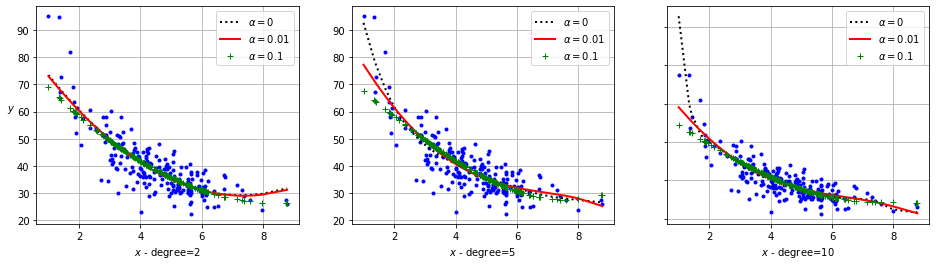

In [79]:
plt.figure(figsize=(16, 4))

plt.subplot(131)
plot_model(X_train, y_train, X_test, y_test, Lasso, polynomial=True, deg=2, alphas=(0, 0.01, 0.1), random_state=69)
plt.ylabel("$y$  ", rotation=0)

plt.subplot(132)
plot_model(X_train, y_train, X_test, y_test, Lasso, polynomial=True, deg=5, alphas=(0, 0.01, 0.1), random_state=69)

plt.subplot(133)
plot_model(X_train, y_train, X_test, y_test, Lasso, polynomial=True, deg=10, alphas=(0, 0.01, 0.1), random_state=69)

plt.gca().axes.yaxis.set_ticklabels([])

In [81]:
# after checking the plots and errors with different alpha and degrees values, we choose:
# Lasso with alpha=0.01 and a Polynomial with degree=5
# (greater than 2 polynomial degree throws a convergence warning)
# (alpha = 0 seems to overfit the model)

lasso_reg = Lasso(alpha=0.01)
lasso_model = make_pipeline(
                PolynomialFeatures(degree=5, include_bias=False),
                StandardScaler(),
                lasso_reg)
# train
lasso_model.fit(X_train, y_train)
lasso_reg.coef_, lasso_reg.intercept_



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.399e+02, tolerance: 8.743e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


(array([-28.48494431,  23.82773453,   0.        ,  -0.07594307,
         -3.55314702]), 40.05315844786256)

Model Estimation:

Degree 2:

$\hat{y} =  -21.16X +13.574X^2 + 40.053$

Degree 5:

$\hat{y} = -28.485X + 23.827X^2 - 0.076X^4 - 3.55X^5 + 40.053$

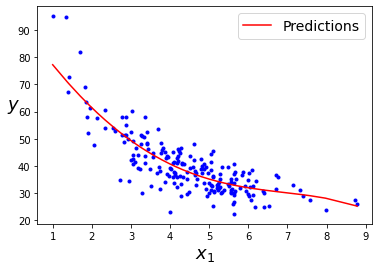

In [84]:
# use test data points to test the model and plot the results
y_hat4 = lasso_model.predict(X_test)

orders = np.argsort(X_test.to_numpy().ravel())

plt.plot(X_test, y_test, "b.")
plt.plot(X_test.iloc[orders], y_hat4[orders], "r-", label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)


In [85]:
# Errors
mae_lasso = metrics.mean_absolute_error(y_test, y_hat4)
rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_hat4))
r2_lasso = r2_score(y_test, y_hat4)

print('Error medio Absoluto (MAE):', mae_lasso)
print('Root Mean Squared Error:', rmse_lasso)
print('r2_score', r2_lasso)

Error medio Absoluto (MAE): 4.335483342801762
Root Mean Squared Error: 5.760309786458159
r2_score 0.7315073629039277


### Conclusiones

Para el modelo Lasso, la variación de los errores es muy poca al aumentar el grado del polinomio de 5 a 10. Aumetando el grado se consigue que el modelo se sobre entrene pero no mejora los resultados con datos nuevos. La  opción más económioca es manejarlo con un grado 2 a 5 y un alpha de 0.01.

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
18489,9421500150,20140623T000000,403500.0,3,1.00,1830,8004,1.0,0,0,...,8,1200,630,1960,0,98125,47.7259,-122.297,1860,7971
20258,6666830170,20140811T000000,778983.0,4,2.50,2490,5647,2.0,0,0,...,8,2490,0,2014,0,98052,47.7043,-122.114,2970,5450
15228,8644500010,20150320T000000,715000.0,3,1.75,1650,7276,1.5,0,4,...,7,1150,500,1928,0,98117,47.6989,-122.399,2300,8088
4107,1725059209,20140929T000000,698000.0,6,2.50,2680,11250,1.0,0,0,...,7,1340,1340,1967,0,98033,47.6553,-122.190,2200,9875
5299,8807810050,20140529T000000,405000.0,3,2.00,1240,14404,1.0,0,0,...,7,1240,0,1988,0,98053,47.6614,-122.060,1350,9990
9593,3537900180,20141020T000000,700000.0,2,1.00,1300,12000,1.0,0,0,...,8,1300,0,1959,0,98004,47.6366,-122.229,2420,15000
19311,1442300035,20140702T000000,355000.0,3,1.75,1730,7416,1.5,0,0,...,7,1730,0,1954,0,98133,47.7600,-122.349,1390,6490
2116,7695500240,20140514T000000,345000.0,3,2.25,2120,15003,2.0,0,0,...,7,2120,0,1984,0,98059,47.4745,-122.120,2070,15203
9738,8701600030,20141113T000000,518000.0,5,1.00,1590,5000,1.5,0,0,...,7,1190,400,1929,0,98116,47.5752,-122.381,1590,5000
20327,9511120050,20140627T000000,427000.0,3,2.50,2432,9391,2.0,0,2,...,9,2432,0,2005,0,98001,47.3453,-122.267,2912,8932


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


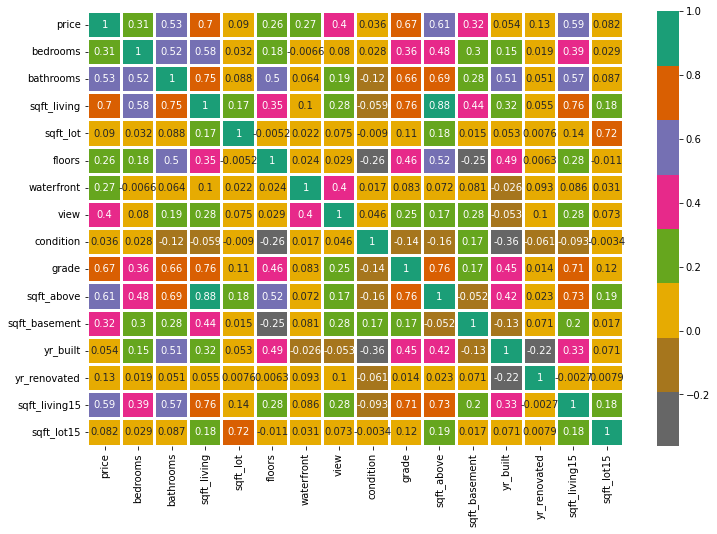

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [ ]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [ ]:
#tu codigo aquí

In [ ]:
# Polynomial, for all the remaining columns in the test dataframe
poly_features2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly2 = poly_features2.fit_transform(X_train)


In [ ]:
# linear regression model
linear_reg2 = LinearRegression(fit_intercept=True)

# train the model
linear_reg2.fit(X_poly2, y_train)
linear_reg2.coef_, linear_reg2.intercept_


(array([[ 9.33912834e+05, -1.09330730e+06, -4.56449932e+02,
         -2.78686288e+01, -2.07407238e+06, -3.95431870e+06,
         -2.88638026e+05,  5.58697570e+05,  1.09864510e+06,
         -2.19758415e+02, -3.82034272e+02, -8.59630908e+04,
         -2.95351595e+03,  3.99965710e+03, -3.40106316e+01,
          9.57541696e+02,  7.49958190e+03, -1.37969466e+01,
         -1.84926695e-02,  8.57699569e+03, -1.14965893e+04,
         -3.06588900e+02, -5.24628836e+03, -5.36788065e+03,
         -1.20757669e+00, -1.46068182e+01, -4.67099451e+02,
         -9.13191519e+00,  1.72800642e+01,  2.15500198e-01,
         -9.63429892e+03,  1.53879172e+01, -1.35842369e-01,
         -2.59067293e+04,  4.33707238e+04,  3.82942459e+03,
         -1.07592927e+03,  2.22971689e+04,  1.44292325e+01,
          1.33928361e+00,  5.03401980e+02, -1.70798805e+01,
         -1.72895923e+01, -5.56785248e-02,  1.56185890e+00,
         -4.34972758e+00,  4.83299456e+00,  1.60303193e+02,
         -1.42711737e+01,  1.31138593e+0